In [1]:
%matplotlib inline

In [2]:
import numpy as np
import seaborn as sb
plt = sb.mpl.pyplot

In [41]:
path_m = "/data/user/lschumacher/projects/stacking/antares/AntaresMC_Muons.dat"
path_nu = "/data/user/lschumacher/projects/stacking/antares/AntaresMC_Neutrinos.dat"
path_exp = "/data/user/lschumacher/projects/stacking/antares/AntaresPS_Blind_Data.dat"

exp = np.genfromtxt(path_exp, names=True)

exp.dtype.names

muons = np.genfromtxt(path_m, names=True)
print muons.dtype.names

mc = np.genfromtxt(path_nu, names=True)

In [5]:
mc.dtype.names = ('ra', 'dec', 'logE', 'sigma', 'trueRa', 'trueDec', 'truelogE', 'ow', 'wbkg')

('Ra', 'Dec', 'logE_rec', 'Beta', 'Ra_MC', 'Dec_MC', 'logE_MC', 'Wsig', 'Wbkg')

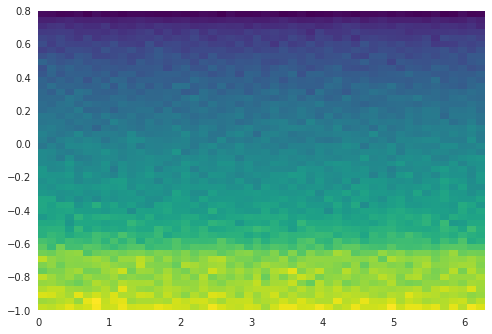

In [12]:
hh = plt.hist2d(np.radians(mc["Ra"]), 
                np.sin(np.radians(mc["Dec"])), cmap=plt.cm.viridis, bins=50,
                weights=mc["Wsig"]*np.power(10, mc["logE_MC"]*-2.19)
               )
plt.grid(False)

In [34]:
for k in mc.dtype.names:
    print k
    print np.count_nonzero(np.isnan(mc[k]))

Ra
0
Dec
0
logE_rec
448
Beta
0
Ra_MC
0
Dec_MC
0
logE_MC
0
Wsig
0
Wbkg
0


In [28]:
mask = np.isnan(mc["logE_rec"])
masked_logE = np.ma.array(mc["logE_rec"], mask=mask, fill_value=1)

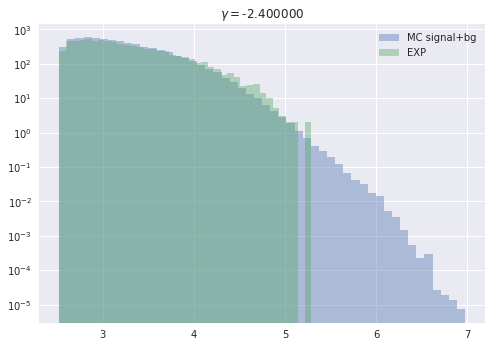

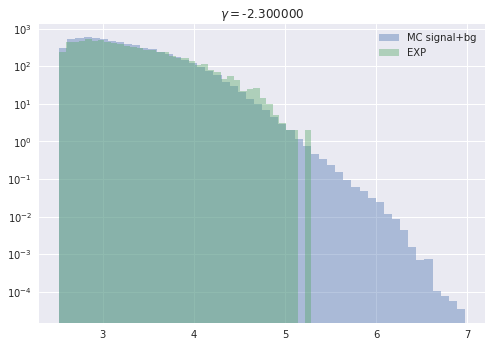

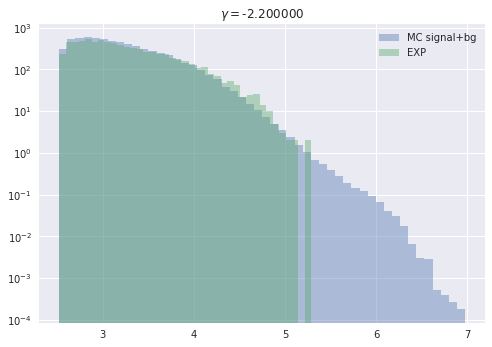

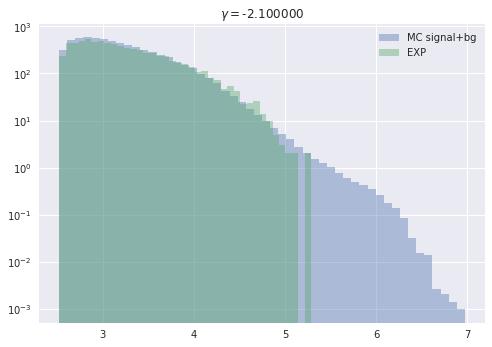

In [56]:
gamma = np.arange(-2.4, -2.0, step=0.1)
for gm in gamma:
    plt.figure()
    sb.distplot(mc["logE_rec"], kde=False, norm_hist=False, label="MC signal+bg",
            hist_kws=dict(weights=mc["Wsig"]*np.power(10, mc["logE_MC"]*gm)*1e-3+mc["Wbkg"]))
    """sb.distplot(mc["logE_rec"], kde=False, norm_hist=False, label="MC background",
            hist_kws=dict(weights=mc["Wbkg"]))"""
    sb.distplot(exp["log10E"], kde=False, norm_hist=False, label="EXP")
    plt.semilogy(nonposy="clip")
    plt.title(r"$\gamma=$%f" %gm)
    plt.legend()

In [35]:
mc = mc[~mask]

## trying to do the analysis on antares data